**1.0 Load Dataset**

- import core libraries numpy & padas for data handling
- read CSV file into DataFrame (df)

In [1]:
import numpy as np
import pandas as pd

# read dataset file
df = pd.read_csv("/kaggle/input/breast-cancer-dataset/Breast_cancer_dataset.csv")

# quick peek (sample of dataset)
display(df.head())

# check size of dataset sample
print("\nDataset Shape: ", df.shape)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



Dataset Shape:  (569, 33)


**1.1 Remove Irrelevant Columns (Clean Data)**

- id is a row identifier, no contribution to prediction
- Unnamed: 32 is an empty column from CSV export 

In [2]:
# drop unused column(s)
df.drop(columns=["id", "Unnamed: 32"], inplace=True)

display(df.head)

print("\nNew Dataset Shape: ", df.shape)

<bound method NDFrame.head of     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        17.99         10.38          122.80     1001.0   
1           M        20.57         17.77          132.90     1326.0   
2           M        19.69         21.25          130.00     1203.0   
3           M        11.42         20.38           77.58      386.1   
4           M        20.29         14.34          135.10     1297.0   
..        ...          ...           ...             ...        ...   
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760


New Dataset Shape:  (569, 31)


**1.2 Inspect Data Structure & Missing Values**

- display each column's data type with count of non-null entries
- total missing (null) values to test if dataset is complete

In [3]:
# check for missing values & types
df.info()

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

**2.0 Explore Target Distribution**

- display samples that are benign (not harmful) or malignant (harmful)
- proportion each class in dataset (%)

In [4]:
# raw counts
counts = df['diagnosis'].value_counts()
print("Counts:")
print(counts)

# percentages
percentages = df['diagnosis'].value_counts(normalize=True*100)
print("\nPercentages:")
print(percentages.round(2))

Counts:
diagnosis
B    357
M    212
Name: count, dtype: int64

Percentages:
diagnosis
B    0.63
M    0.37
Name: proportion, dtype: float64


**2.1 Visualize Class Balance**

<function matplotlib.pyplot.show(close=None, block=None)>

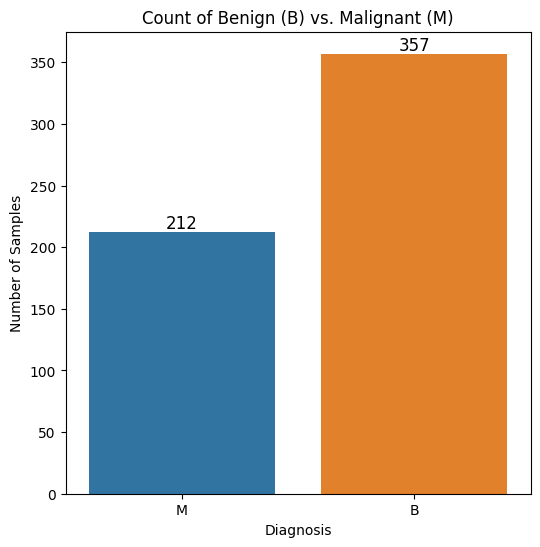

In [5]:
# bar chart
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.countplot(x='diagnosis', data=df)
plt.title("Count of Benign (B) vs. Malignant (M)")
plt.xlabel("Diagnosis")
plt.ylabel("Number of Samples")

for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2, height + 3, int(height), ha="center", fontsize=12)
plt.show

**3.0 Discriminative Features**

By calculating the difference of the means of each feature separately for M & B, we can distrinquish which features likely are the most informative for distinguishing the two classes.

In [6]:
# computing mean differences
means = df.groupby('diagnosis').mean().T
means['diff'] = (means['M'] - means['B']).abs()

top_feats = means.sort_values('diff', ascending=False)['diff'].head(8)
print(top_feats)

area_worst         863.386881
area_mean          515.586219
perimeter_worst     54.364392
area_se             51.537257
perimeter_mean      37.289971
radius_worst         7.755010
texture_worst        5.803138
radius_mean          5.316306
Name: diff, dtype: float64


**3.1 Interpret Discriminative Features**
Visualize the features' difference in each class.

<function matplotlib.pyplot.show(close=None, block=None)>

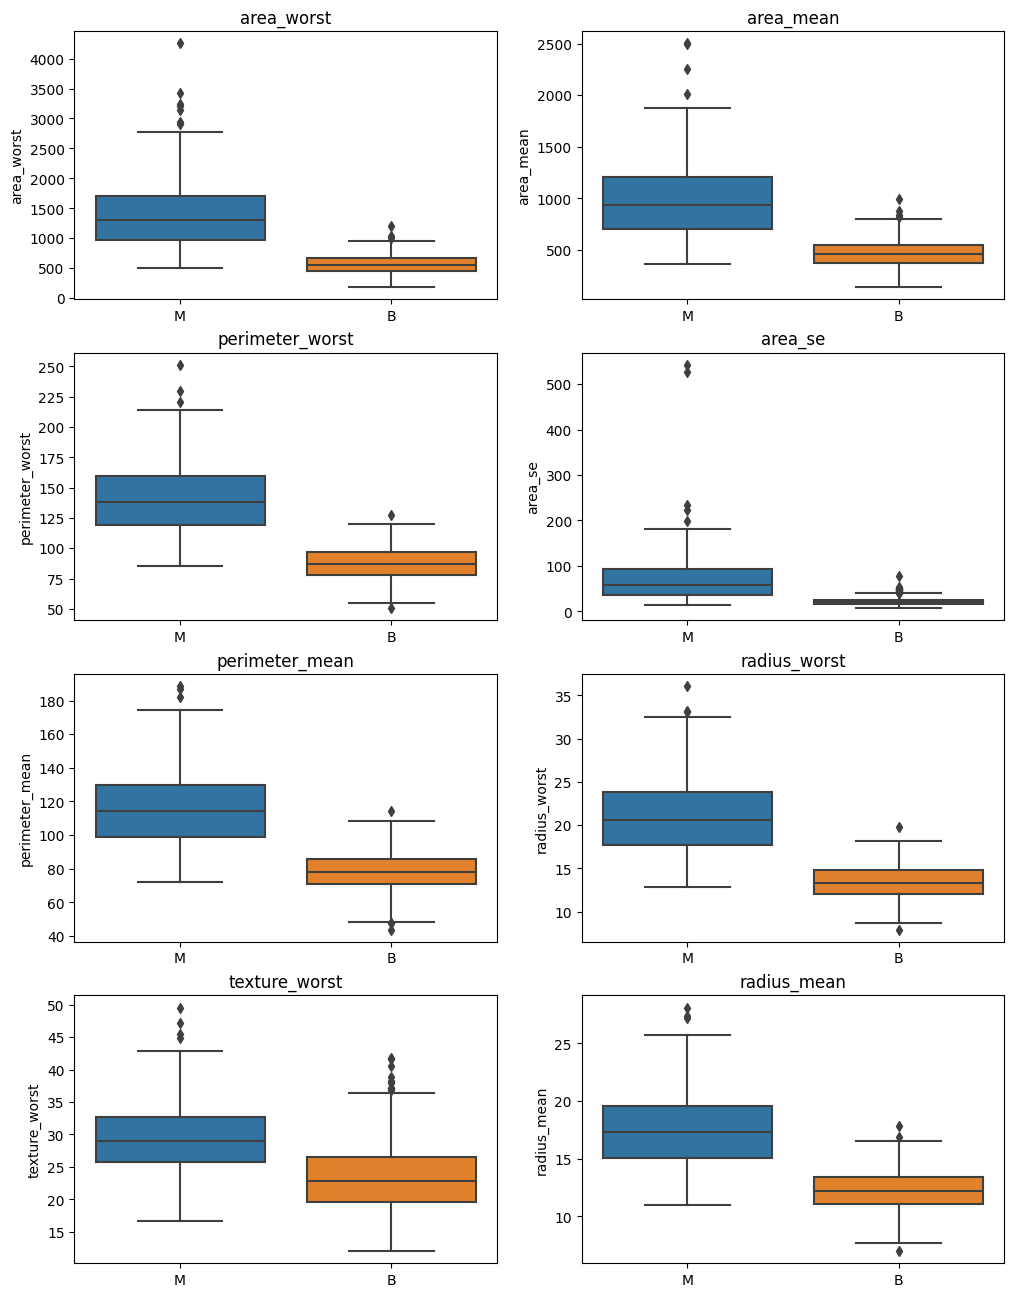

In [7]:
features = top_feats.index.tolist()

n = len(features)
cols = 2
rows = (n+1) // cols
fig, axes = plt.subplots(rows, cols, figsize=(cols*6, rows*4))

for ax, feat in zip(axes.flatten(), features):
    sns.boxplot(x='diagnosis', y=feat, data=df, ax=ax)
    ax.set_title(feat)
    ax.set_xlabel('')
    ax.set_ylabel(feat)

# remove empty subsplots
for j in range(n, rows*cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout
plt.show

**4.0 Prepare Feature Matrix & Target Variable**

In [8]:
features = top_feats.index.tolist()

x = df[features].copy()

# encode M -> 1, B -> 0
y = df['diagnosis'].map({'M':1, 'B':0})

**4.1 Split Data into Training & Test Sets**

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size = 0.2,
    stratify = y,
    random_state = 42
)

**4.2 Feature Scaling (Standardization)**

In [10]:
from sklearn.preprocessing import StandardScaler

# tree-based models does not need scaling, but scale in case using different algorithm
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

**5.0 Train & Evaluate Multiple Classifiers**

In [11]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tqdm.auto import tqdm

# dict of models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_jobs=-1, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
}

# container for summarizing malignant-class metrics
results = []

# loop, train, predict, print, and collect
for name, model in tqdm(models.items(), desc="Training models"):
    model.fit(x_train, y_train) 
    y_pred = model.predict(x_test)
    
    print(f"=== {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=['Benign','Malignant']))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred), "\n")
    
    # Store malignant-class precision/recall/f1
    report = classification_report(y_test, y_pred, output_dict=True)
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (M)': report['1']['precision'],
        'Recall (M)': report['1']['recall'],
        'F1-score (M)': report['1']['f1-score']
    })

# build a comparison table
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
print("=== Summary Table ===")
print(results_df.to_string(index=False))

Training models:   0%|          | 0/6 [00:00<?, ?it/s]

=== Random Forest ===
Accuracy: 0.9386
              precision    recall  f1-score   support

      Benign       0.91      1.00      0.95        72
   Malignant       1.00      0.83      0.91        42

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114

Confusion Matrix:
 [[72  0]
 [ 7 35]] 

=== AdaBoost ===
Accuracy: 0.9298
              precision    recall  f1-score   support

      Benign       0.91      0.99      0.95        72
   Malignant       0.97      0.83      0.90        42

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix:
 [[71  1]
 [ 7 35]] 

=== XGBoost ===
Accuracy: 0.9561
              precision    recall  f1-score   support

      Benign       0.94      1.00      0.97        72
   Malignant       1.00      0.88      0.94        

**6.0 Conclusions**

- XGBoost achieved 95.6% accuracy, best balance of detecting true positives (malignant tumors) while avoiding false alarms
- If prioritizing minimizing missed malignancies, further tune XGBoost or adjust decision thresholds to increase recall
- If prioritizing minimizing false positives, 100% precision with XGBoost & Random Forest seems promising